<script type="text/x-mathjax-config">

MathJax.Hub.Config({

  tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}

});

</script>

<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/latest.js?config=TeX-MML-AM_CHTML' async></script>

## Project1 이진 분류기 모델 구현하기

### 1. 개요

이번 프로젝트에서는 머신러닝에서 사용되는 이진 분류기(binary classifier)를 구현하고자 한다. 이진 분류기는 지도 학습에 사용될 수 있으며, 테스트 데이터셋을 바탕으로 모델을 최적화한다.

이진 분류기를 이용하면 데이터를 레이블 단위로 분류할 수 있다. 이번 프로젝트에서는 이진 분류기의 가장 기본적인 형태인 아달린(Adaline)을 구현하고자 한다. 

프로젝트에서는 업계 표준 라이브러리인 Numpy와 Pandas 그리고 Matplotlib을 이용한다. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from projectfiles.analyzer.graphics import plot_data, plot_decision_regions

### 2. 지도학습 데이터셋

지도학습(Supervised Learning)은 사용자가 머신러닝 모델에 정답을 제공하면 해당 모델이 문제 상황과 정답을 바탕으로 스스로 학습하는 인공지능 알고리즘을 말한다. 지도학습을 수행하는 인공지능 모델은 우선 아무런 정보가 없는 상태에서 결과값을 예측한다. 그리고 정답과 비교했을 때 그것이 정답과 같지 않으면 다음번에 시도했을 때 보다 정답에 가까운 결과가 나오게끔 내부 알고리즘을 조정한다. 그렇게 데이터셋을 예측하는 작업을 반복적으로 수행하면 점점 모델의 예측 정확도가 증가할 것이다.

분류 문제(classification problems)는 지도학습으로 해결할 수 있는 문제들 중 하나이다. 분류 문제를 푸는 방법은 앞서 말한 지도학습의 방법과 동일하다:

1. 먼저 데이터의 학습을 위한 인동지능 모델을 구현한다.
2. 모델은 아무런 정보가 없는 상태에서 각 데이터의 레이블을 예측한다.
3. 예측값과 실제 데이터의 클래스 레이블을 비교한다.
4. 비교한 결과를 바탕으로 알고리즘을 갱신한다.

위의 과정을 통해 분류 문제를 해결할 수 있다. 이대 중요한 것은 데이터셋 자체가 정답 레이블에 대한 정보를 포함해야 한다는 것이다. 따라서 모델을 구현하기에 앞서 먼저 데이터셋을 준비한다.

아래에 제시된 붓꽃 데이터셋을 보자. 이 데이터셋은 사이킷런(sklearn)에서 제공하는 데이터셋이다.

In [2]:
ds = datasets.load_iris()

X = ds.data
y = ds.target

X[:10], y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

`ds`는 사이킷런의 `datasets`에서 정의되어있는 붓꽃 데이터셋이다. 이 데이터셋에 정의되어 있는 데이터는 `ds.data`이고, 정답 레이블은 `ds.target`이다. 데이터 내부의 각 요소들은 각 데이터의 특징들을 나타내며 보다시피 각 데이터는 총 네가지의 특징으로 구분된다. 정답 레이블의 각 요소들은 각 데이터들의 실제 클래스 레이블을 의미한다. 일반적으로 머신러닝에서 사용하는 데이터 레이블은 정수로 인코딩되며 아래와 같이 나타난다.

In [3]:
np.unique(y)

array([0, 1, 2])

따라서 이 데이터셋의 클래스 레이블은 총 3개로 0, 1, 2이다.

n번째 데이터의 클래스 레이블은 다음과 같이 구할 수 있다.

In [4]:
X[52], y[52]

(array([6.9, 3.1, 4.9, 1.5]), 1)

52번째 데이터의 클래스 레이블은 1이다.

아래 코드는 붓꽃 데이터셋 모든 데이터를 0번과 2번 특징을 기준으로 시각화한다.

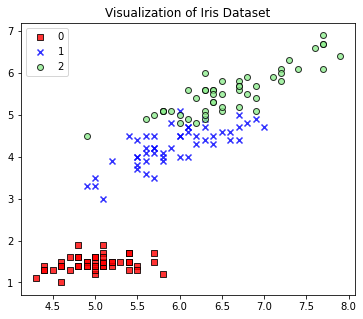

In [5]:
data = pd.DataFrame(X).iloc[:, [0, 2]].values
label = y[:]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot()

plot_data(data, label, resolution=0.02, names='default', ax=ax)
ax.set_title('Visualization of Iris Dataset')
ax.legend()

plt.show()

그림에서 가로축은 0번 특징, 세로 축은 1번 특징을 나타낸다.

앞서 확인했듯 붓꽃 데이터셋은 각 데이터들과 더불어 정답 레이블들을 포함한다. 따라서 이 데이터셋을 가지고 분류 문제를 실습할 것이다. 이제 데이터셋의 준비가 끝났다. 지금부터는 위에서 소개한 붓꽃 데이터셋을 학습할 수 있는 머신러닝 모델을 만들고 실제로 학습을 진행할 것이다.

### 3. 이진 분류기 개요

이진 분류기(Binary Classifier)는 어떠한 데이터의 클래스를 둘 중 하나로 분류하는 모델을 말한다. 보통의 이진 분류기 모델은 데이터를 양성(positive) 클래스 레이블, 혹은 음성(negative) 클래스 레이블로 구분한다. 따라서 이진 분류기는 2개 이상의 클래스 레이블을 갖는 데이터셋을 학습할 수 없으며, 오직 두개의 클래스 레이블만을 갖는 데이터셋을 분류하느데만 사용될 수 있다.

예를 들어 앞서 소개한 붓꽂 데이터셋은 클래스 레이블이 총 3개이다. 따라서 정상적인 이진 분류기 모델은 이 데이터셋을 학습할 수 없다. 따라서 앞서 정의한 분류 문제를 이진 분류 문제로 축소하기 위해 데이터셋에서 몇가지 데이터를 배제하여 클래스 레이블의 개수가 두 개가 되도록 만들고자 한다.

앞서 정의한 데이터셋에서 클래스 레이블이 0 혹은 1인 데이터만 뽑아낸다.

In [6]:
idx = [*np.where(y == 0)[0], *np.where(y == 1)[0]]

data = pd.DataFrame(X).iloc[idx, [0, 2]].values
label = label[idx]

np.unique(label)

array([0, 1])

위의 데이터만을 이용하여 학습을 진행한다.